In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import *
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
color = sns.color_palette()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/usr/local/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


In [2]:
################################ Feature Engineering ################################

In [2]:
ts = pd.read_csv('training_set.csv')

In [3]:
#imp_feature=prop_16.loc[:,prop_null<80]#imp_feature=prop_16.loc[:,prop_16[prop_null<80]]
ts.drop(['propertycountylandusecode','propertyzoningdesc', 'transactiondate'],axis=1,inplace=True)
ts.fillna(ts.mean(), inplace=True)
ts.head()

,parcelid,logerror,year_x,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,unitcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,11016594,0.0276,2016,2.0,3.0,4.00000,2.0,1684.0,1684.0,6037.0,2.0,2.00000,34280990.0,-118488536.0,7528.0,261.0,6.037107e+07,12447.0,3101.0,31817.000000,96370.0,0.0,1.000000,1959.0,122754.0,360170.0,2015.0,237416.0,6735.88,6.037107e+13
1,14366692,-0.1684,2016,3.5,4.0,5.55865,3.5,2263.0,2263.0,6059.0,3.0,3.89455,33668120.0,-117677556.0,3643.0,261.0,6.059052e+07,32380.0,1286.0,189415.894195,96962.0,0.0,1.110391,2014.0,346458.0,585529.0,2015.0,239071.0,10153.02,6.049424e+13
2,12098116,-0.0040,2016,3.0,2.0,4.00000,3.0,2217.0,2217.0,6037.0,3.0,2.00000,34136312.0,-118175032.0,11423.0,261.0,6.037464e+07,47019.0,3101.0,275411.000000,96293.0,0.0,1.000000,1940.0,61994.0,119906.0,2015.0,57912.0,11484.48,6.037464e+13
3,12643413,0.0218,2016,2.0,2.0,4.00000,2.0,839.0,839.0,6037.0,2.0,2.00000,33755800.0,-118309000.0,70859.0,266.0,6.037296e+07,12447.0,3101.0,54300.000000,96222.0,0.0,1.000000,1987.0,171518.0,244880.0,2015.0,73362.0,3048.74,6.037296e+13
4,14432541,-0.0050,2016,2.5,4.0,5.55865,2.5,2283.0,2283.0,6059.0,2.0,3.89455,33485643.0,-117700234.0,6000.0,261.0,6.059042e+07,17686.0,1286.0,189415.894195,96961.0,8.0,1.110391,1981.0,169574.0,434551.0,2015.0,264977.0,5488.96,6.059042e+13


In [4]:
######## Filter Feature Selection Method ########
# For each feature i, compute some measure of how imformative xi is about y
# 1. Correlation
import xgboost as xgb
f_label = ts['logerror']
f_train = ts.drop('logerror', axis=1)
model = xgb.XGBRegressor()
model.fit(f_train, f_label)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [5]:
print(model.feature_importances_)

[ 0.09077156  0.01512859  0.02723147  0.02269289  0.00907716  0.00302572
  0.0816944   0.05900151  0.          0.          0.01361573  0.05446294
  0.07261725  0.06202723  0.01815431  0.01059001  0.03782148  0.
  0.02118003  0.02571861  0.00605144  0.02118003  0.0408472   0.06354009
  0.04992436  0.          0.05748865  0.11649016  0.01966717]


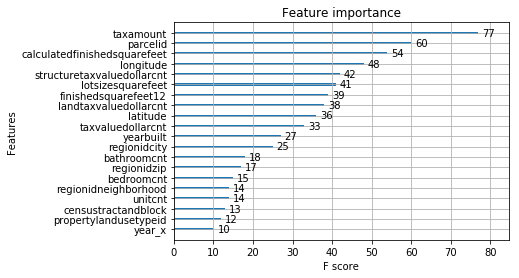

In [6]:
from xgboost import plot_importance
plot_importance(model, max_num_features=20)
plt.show()

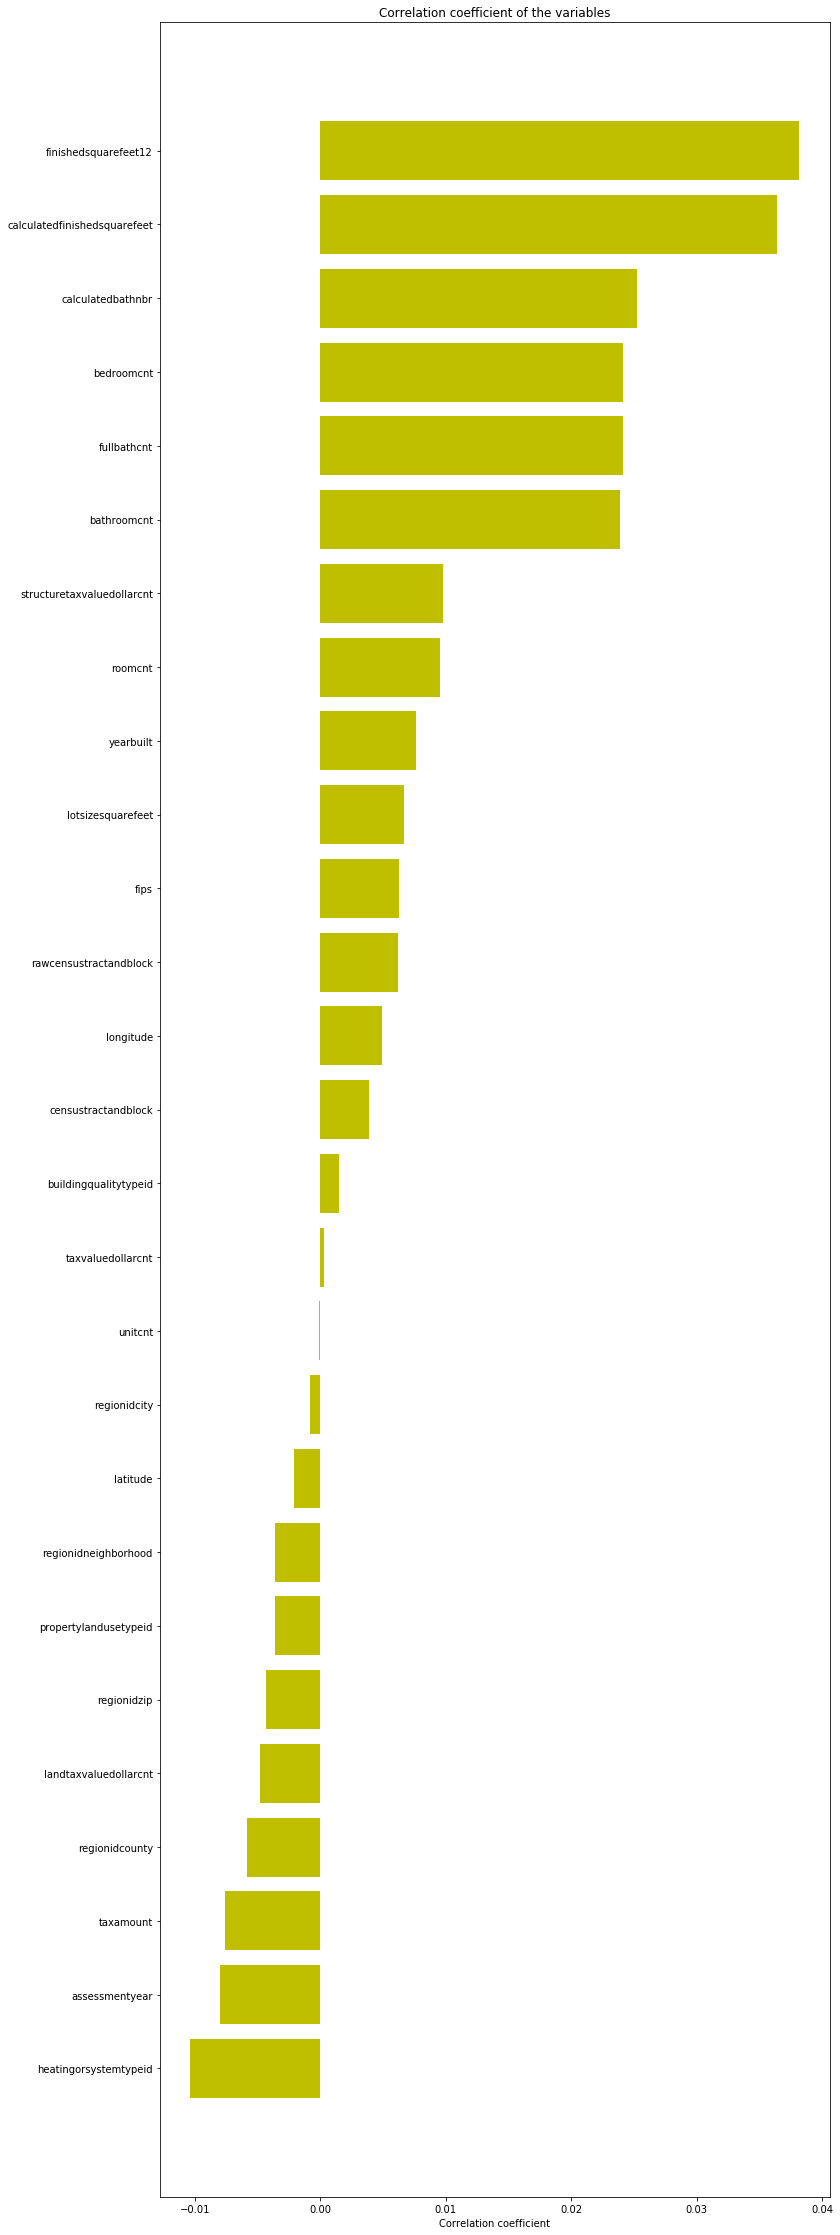

In [7]:
# Let us just impute the missing values with mean values to compute correlation coefficients #
mean_values = ts.mean(axis=0)
ts = ts.fillna(mean_values, inplace=True)

# Now let us look at the correlation coefficient of each of these variables #
x_cols = [col for col in ts.columns if col not in ['logerror'] if ts[col].dtype=='float64']

labels = []
values = []
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(ts[col].values, ts.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')
    
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
ax.set_xlabel("Correlation coefficient")
ax.set_title("Correlation coefficient of the variables")
#autolabel(rects)
plt.show()

In [8]:
# 2. Mutual Information
from minepy import MINE
m = MINE()
mi = []
co = ['taxamount']#,'calculatedfinishedsquarefeet','longitude','landtaxvaluedollarcnt',\
                #'structuretaxvaluedollarcnt','finishedsquarefeet12','taxvaluedollarcnt',\
                #'latitude','lotsizesquarefeet','bedroomcnt','censustractandblock']
for c in co:
    f = ts[c]
    m.compute_score(f, f_label)
    mi.append(m.mic())
print(mi)
# from sklearn.model_selection import GridSearchCV
# import copy
# param_test2b = {
#  'min_child_weight':[6,8,10,12],
#  'learning_rate':[1, .1, .001],
#   'n_estimators': [100, 200, 300],
#    'max_depth': [3, 5, 6]
# }

# gsearch2b = GridSearchCV(estimator = xgb.XGBRegressor( learning_rate=0.1, n_estimators=140, max_depth=4,
# min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
# objective= 'reg:linear', nthread=4, scale_pos_weight=1,seed=27), 
# param_grid = param_test2b, scoring='neg_mean_squared_error',n_jobs=4,iid=False, cv=5)
# gsearch2b.fit(f_train,f_label.values)

[0.020451779822291048]


In [48]:
################################ End of Feature Engineering ################################